<h1 style='background:; border:10; border-radius: 25px; font-size:200%; font-weight: bold; color:rgb(0, 100, 0)'><center>The Promotion Game: Predict Who Will Win 🎖️</center></h1>
<h1 style='background:; border:10; border-radius: 25px; font-size:150%; font-weight: bold; color:rgb(0, 100, 0)'><center> The Signs You're on Right Track for a Promotion 📈💯 </center></h1>

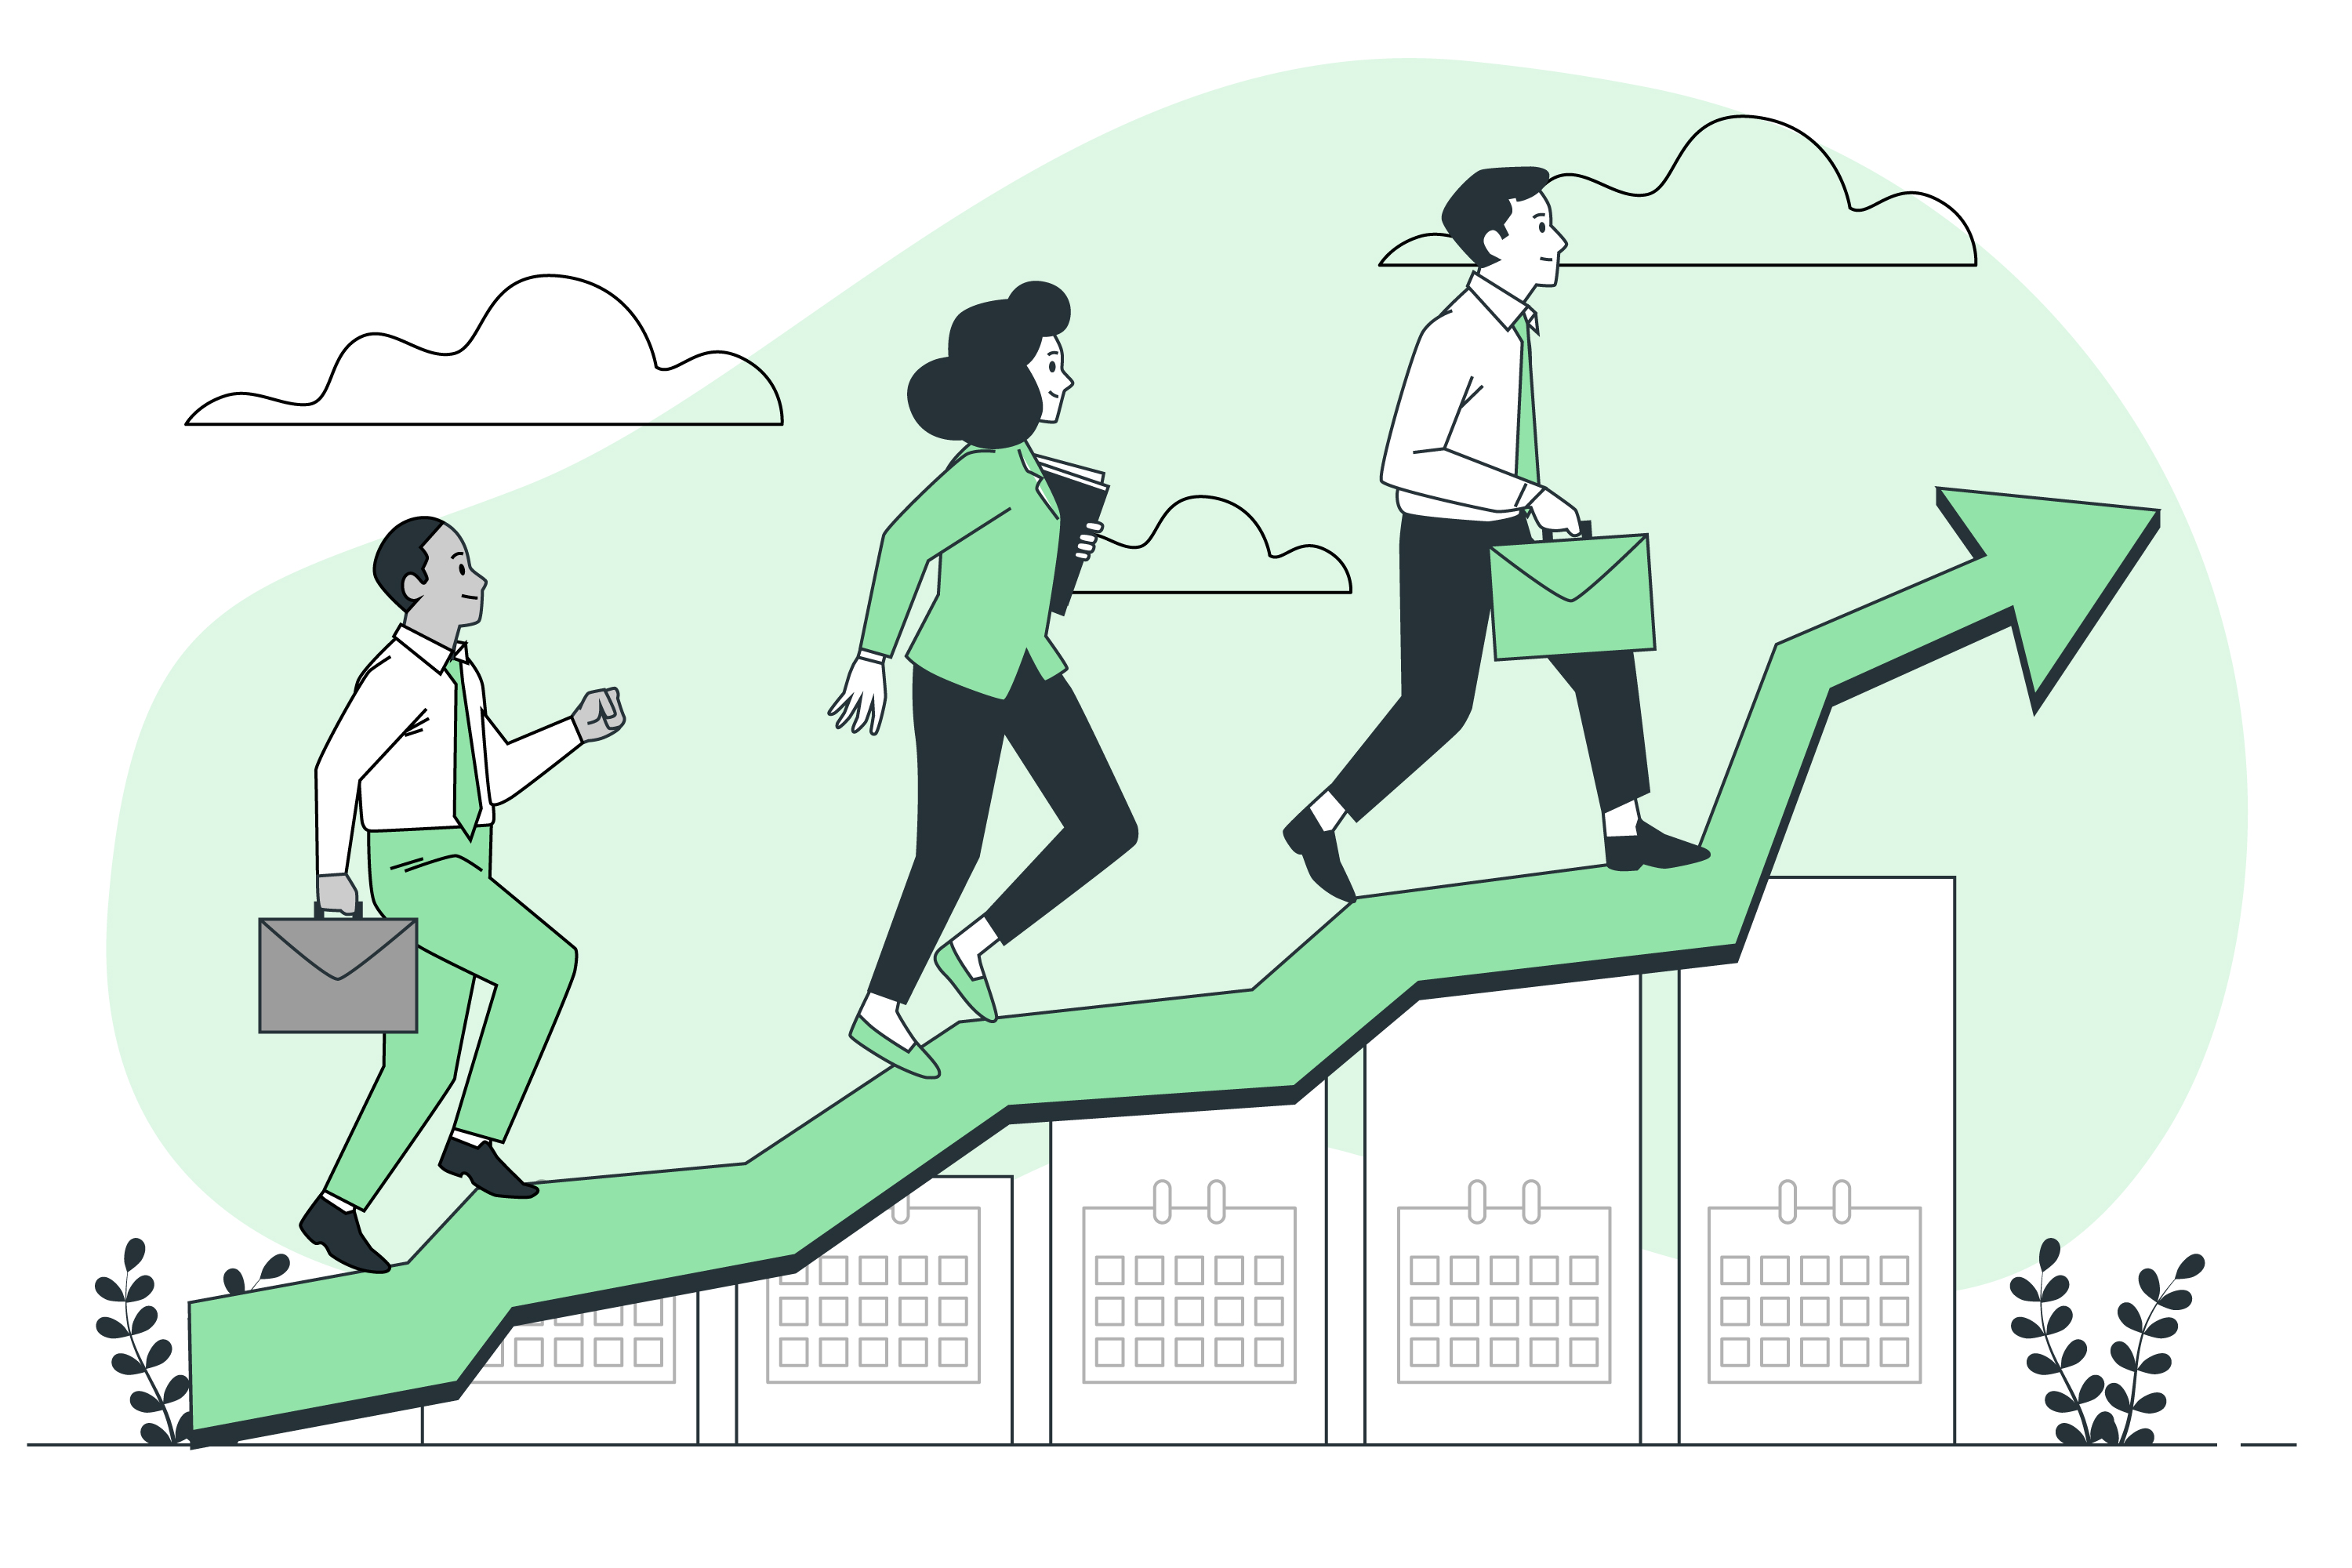<a href="https://www.freepik.com/free-vector/job-promotion-concept-illustration_51767572.htm#query=promotion&position=2&from_view=search&track=sph&uuid=5f982f83-715a-457d-a2da-c81ba2acd0b0?sign-up=google">Image by storyset</a> on Freepik

<a class="anchor" id="tc"></a>
### <span style='color:rgb(0, 100, 0)'><b>Table of Contents</b></span>
<hr>

* [<b>Challenge: What problem are we aiming to solve?</b>](#challenge)
* [<b>Abstract</b>](#abstract)
* [<b>About Dataset, and Import Dataset </b>](#dataImport)
* [<b>Key Findings in Statistical Analysis</b>](#statisticalAnalysis)
     * [Descriptive Statistics](#descriptivestats)
     * [Check and Handle Missing Values](#missingImpute)
     * [Mann-Whitney U Test and Correlation Analysis](#correlation)
     * [Chi-Square Test for Independence](#chiSquare)
     * [<b>Summary of Statistical Analysis</b>](#summaryStats)
* [<b>Key Findings in Visualization</b>](#visualizationInsights)
     * [Count Plots and Pie Charts for Single Categorical Feature](#catPlot)
     * [Count Plots for Multiple Features](#catMulti)
     * [<b>Summary of Visualization</b>](#summaryVisualization)
* [<b>Data Preprocessing</b>](#dataPreprocessing)
    * [Define Pipeline for Data Preprocessing](#definePipeline)
* [<b>Machine Learning Models</b>](#mlModels)
<a class="anchor" id="modelAnchor"></a>
    * [Logistic Regression, Random Forests, XGBoost, Neural Networks](#models)
    * [<b>Summary of Machine Learning Models</b>](#summaryModels)
* [<b>Final Model, and Interpretation</b>](#finalModel)
* [<b>Submission</b>](#submission)
<a class="anchor" id="bcImp1"></a>

## <span style='color:rgb(0, 100, 0)'><b>1 | Challenge: What problem are we aiming to solve? </b></span><a class="anchor" id="challenge"></a> 
<hr>
<b>
    
* One challenge is figuring out the suitable candidates to promote, particularly for positions below the manager level, and getting them ready for the promotion on time.

* Promotions are announced only after the assessment, causing a delay in transition to new roles. 

* So, the company needs assistance in finding the right people at a specific stage to speed up the whole process of promotions.
</b>
<hr>

## <span style='color:rgb(0, 100, 0)'><b>2 | Abstract</b></span><a class="anchor" id="abstract"></a> 
<hr>

[Back to Table of Contents](#tc)

<b>Purpose:</b> Develop a predictive model for identifying suitable candidates for job promotion within the organization. Our main focus is to utilize employee data to understand factors influencing employee promotions and build a model for accurate predictions.

<b>Methodology:</b> Use comprehensive employee data including attributes like performance ratings, training history, demographics, and past promotions. Conduct statistical analysis and visualization to explore relationships between variables. Preprocess data to enhance predictive power. Employ machine learning techniques to build a predictive model based on factors.

<b>Results:</b> Develop a robust model accurately predicting suitable candidates for promotion. __XGBoost__ outperform other models with higher accuracy, the best ROC AUC score, and the highest F1 score, indicating better overall performance and class separation ability. Highlight influential variables such as previous performance ratings, training history, and tenure in predicting promotions.

<b>Conclusions:</b>The developed model accurately identifies employees likely to be promoted, aiding in efficient talent management. Insights into key factors influencing promotions can guide strategic decisions in talent development and organizational growth.

## <span style='color:rgb(0, 100, 0)'><b>3 | About Dataset, and Import Dataset</b></span><a class="anchor" id="dataImport"></a> 
<hr>

[Back to Table of Contents](#tc)

__About Dataset__

Dataset includes a wide range of employee-related information, including demographics, performance history, training, and promotion status. 

__Features:__

* __employee_id:__ Unique ID for employee
* __department:__ Department of employee
* __region:__ Region of employment (unordered)
* __education:__ Education Level
* __gender:__ Gender of Employee
* __recruitment_channel:__ Channel of recruitment for employee
* __no_ of_ trainings:__ no of other trainings completed in previous year on soft skills, technical skills etc.
* __age:__ Age of Employee
* __previous_year_rating:__ Employee Rating for the previous year
* __length_ of_ service:__ Length of service in years
* __awards_ won?:__ if awards won during previous year then 1 else 0
* __avg_ training_ score:__ Average score in current training evaluations
* __is_promoted:__ (Target) Recommended for promotion


### <span style='color:rgb(0, 100, 0)'><b>Import Libraries</b></span><a class="anchor" id="imp"></a> 

<hr>

In [1]:
import os
import platform
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from copy import copy
import pickle
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from platform import python_version

sns.set(rc={"axes.facecolor":"#f4f0bb","figure.facecolor":"#f4f0bb"})
sns.set_context("poster",font_scale = .5)

palette = ['#fd7f6f', '#7eb0d5', '#b2e061', '#bd7ebe', '#ffb55a', '#ffee65', '#beb9db', '#fdcce5', '#8bd3c7']
palette_cmap=["#CC0028","#ef3f28","#f36b3b","#faa96e","#FEE08B","#fcdcb0","#6faea4","#008b99","#026e90","#00507A","#11264e"]

#sns.palplot(sns.color_palette(palette))
plt.show()

In [2]:
print('Python version:', python_version())

Python version: 3.7.12


### <span style='color:rgb(0, 100, 0)'><b>Import Dataset</b></span><a class="anchor" id="imp"></a> 

<hr>

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hr-ana/train.csv
/kaggle/input/hr-ana/test.csv


In [4]:
train = pd.read_csv('../input/hr-ana/train.csv')
test = pd.read_csv('../input/hr-ana/test.csv')

### <span style='color:rgb(0, 100, 0)'><b>Check categorical and numerical features</b></span><a class="anchor" id="imp"></a> 

<hr>

In [5]:
# For categorical
cat = [i for i in train.columns if train.dtypes[i]=='object']

print("Categorical Features:",cat)

Categorical Features: ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [6]:
# For Numerical
num = [i for i in train.columns if train.dtypes[i]!='object']
print("Continuous or Numerical Features:",num)

Continuous or Numerical Features: ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']


#### <span style='color:rgb(0, 100, 0)'><b>Based on above observation, we define our categorical, numerical, and id variables</b></span><a class="anchor" id="imp"></a> 

<hr>

In [7]:
cat_columns = ["department","region","education","gender","recruitment_channel","no_of_trainings","awards_won?"]
num_columns = ["age","previous_year_rating","length_of_service","avg_training_score"]
id_dep_columns = ["employee_id","is_promoted"]

## <span style='color:rgb(0, 100, 0)'><b>4 | Key Findings in Statistical Analysis</b></span><a class="anchor" id="statisticalAnalysis"></a> 
<hr>

[Back to Table of Contents](#tc)

### <span style='color:rgb(0, 100, 0)'><b>4.1 | Descriptive Statistics</b></span><a class="anchor" id="descriptivestats"></a> 

<hr>

Begin by understanding the <b>dataset's summary statistics (range, mean, median, and distribution)</b> for numerical variables like <b>age, no_of_trainings, length_of_service, and avg_training_score</b>.

In [8]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


__Observation on training dataset:__

* __Count:__ There are __54,808__ observations in the __training dataset__.

* __no_of_trainings:__ On average, employees have undergone around __1.25__ training sessions, with a minimum of __1__ and a maximum of __10__.

* __age:__ The average age of employees is approximately __34.80 years__, with a minimum age of __20__ and a maximum age of __60__.

* __previous_year_rating:__ The average rating from the previous year is __3.33__, with a minimum rating of __1__ and a maximum rating of __5__.

* __length_of_service:__ The average length of service is approximately __5.87 years__, with a minimum of __1__ year and a maximum of __37 years__.

* __awards_won?:__ A small percentage of employees (__2.32%__) have won awards (values are 0 or 1).

* __avg_training_score:__ The average training score is around __63.39__, with a minimum score of __39__ and a maximum score of __99__.

* __is_promoted:__ Approximately __8.52%__ of employees have been promoted (values are 0 or 1).

In [9]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


__Observation on testing dataset:__

* __Count:__ There are __23,490__ observations in the testing dataset.

* __no_of_trainings:__ On average, employees have undergone around __1.25__ training sessions, with a minimum of __1__ and a maximum of __9__.

* __age:__ The average age of employees is approximately __34.78 years__, with a minimum age of __20__ and a maximum age of 60.

* __previous_year_rating:__ The average rating from the previous year is __3.34__, with a minimum rating of __1__ and a maximum rating of __5__.

* __length_of_service:__ The average length of service is approximately __5.81 years__, with a minimum of __1__ year and a maximum of __34 years__.

* __awards_won?:__ A small percentage of employees (__2.28%__) have won awards (values are 0 or 1).

* __avg_training_score:__ The average training score is around __63.26__, with a minimum score of __39__ and a maximum score of __99__.

__Overall observation:__

* The two datasets are similar in terms of the variables they contain.
* Both datasets have similar average values for key features like __age, previous_year_rating, length_of_service, awards_won?, and average_training_score.__
* The __length_of_service__ has a maximum of __37 years__ in the training dataset, while it is __34 years__ in the testing dataset.
* __70% (54,808/78,298)__ used as the training dataset, and __30% (23,490/78,298)__ for testing.

__Note:__ It's crucial to ensure that the testing dataset is representative of the training dataset to build a reliable predictive model. Understanding these similarities and differences helps in preparing and preprocessing the data appropriately for model training and evaluation.

### <span style='color:rgb(0, 100, 0)'><b>4.2 | Check and Handle Missing Values</b></span><a class="anchor" id="missingImpute"></a> 
<hr>

[Back to Table of Contents](#tc)

There could be several reasons for missing values in the __"Education"__ and __"Previous_year_rating"__ variables.

__For Education:__

* __Non-Reporting:__ Some employees might not have provided their educational details during data collection or entry.
* __Educational Background:__ In some cases, certain roles or positions might not require specific educational qualifications, leading to non-disclosure.

But, I did not find any specific reason for missingness in Education variable.

__Suggested Solution:__

* Creating a new label __Unknown__ to represent missing values in the __education variable__.

__For Previous_year_rating:__

* __New Employees:__ Missing ratings might be due to new employees who haven't completed a promotion year to receive a previous year's rating.

I reviewed both the data __(train and test)__ and noticed that the __Previous_year_rating__ values are missing specifically for individuals with a __length_of_service__ of 1.

__Suggested Solution:__

* __Assigning a Default Value:__ Since new employees don't have a previous year's rating, assigning a default value __0__ to indicate their lack of a previous year's rating.

#### <span style='color:rgb(0, 100, 0)'><b>Check missing values in the training dataset</b></span><a class="anchor" id="imp"></a> 

<hr>

In [10]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

#### <span style='color:rgb(0, 100, 0)'><b>Check missing values in the testing dataset</b></span><a class="anchor" id="imp"></a> 

<hr>

In [11]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [12]:
train_df = train.copy()
test_df = test.copy()

#### <span style='color:rgb(0, 100, 0)'><b>Missing value imputation for training dataset</b></span><a class="anchor" id="imp"></a> 

<hr>

In [13]:
from sklearn.impute import SimpleImputer

# Impute 'Education' column with 'Unknown'
edu_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
train_df['education'] = edu_imputer.fit_transform(train_df[['education']])

# Impute 'Previous_Year_Rating' column with 0
rating_imputer = SimpleImputer(strategy='constant', fill_value=0)
train_df['previous_year_rating'] = rating_imputer.fit_transform(train_df[['previous_year_rating']])

train_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [14]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


#### <span style='color:rgb(0, 100, 0)'><b>Missing value imputation for testing dataset</b></span><a class="anchor" id="imp"></a> 

<hr>

In [15]:
from sklearn.impute import SimpleImputer

# Impute 'Education' column with 'Unknown'
edu_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
test_df['education'] = edu_imputer.fit_transform(test_df[['education']])

# Impute 'Previous_Year_Rating' column with 0
rating_imputer = SimpleImputer(strategy='constant', fill_value=0)
test_df['previous_year_rating'] = rating_imputer.fit_transform(test_df[['previous_year_rating']])

test_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

### <span style='color:rgb(0, 100, 0)'><b>4.3 | Mann-Whitney U Test and Correlation Analysis</b></span><a class="anchor" id="correlation"></a> 
<hr>

[Back to Table of Contents](#tc)

### <span style='color:rgb(0, 100, 0)'><b>Mann-Whitney U Test</b></span><a class="anchor" id="T-test"></a> 
<hr>

[Back to Table of Contents](#tc)

The __Mann-Whitney U-test__ is used to compare two independent groups when the data is either ordinal or not normally distributed.

__How it Works:__

* __Decision:__ If the p-value is less than the chosen significance level (commonly 0.05), you reject the null hypothesis and conclude that there is a significant difference between the two groups.

Here, we check significant difference between the two groups __is_promoted__ vs __(age, previous_year_rating, length_of_service, and avg_training_score)__.

In [16]:
train_df[num_columns].head()

,age,previous_year_rating,length_of_service,avg_training_score
0,35,5.0,8,49
1,30,5.0,4,60
2,34,3.0,7,50
3,39,1.0,10,50
4,45,3.0,2,73


First, we check visually difference between the two groups (across promoted and non-promoted) using __Violin plots__ for __is_promoted__ vs __(age, previous_year_rating, length_of_service, and avg_training_score)__.

Let's have a look on the distribution of subtype in the basal dataset :


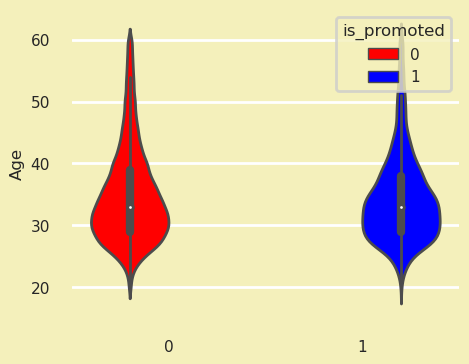

In [17]:
# Define custom colors
custom_colors = {0: "Red", 1: "Blue"}

print("Let's have a look on the distribution of subtype in the basal dataset :")
plt.subplots(figsize=(5, 4))
cp=sns.violinplot(x=train_df["is_promoted"],y=train_df["age"], hue = train_df['is_promoted'], palette=custom_colors, saturation=1, linewidth = 2)
cp.axes.set_xlabel("",fontsize=12)
cp.axes.set_ylabel("Age",fontsize=12)
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})
sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the distribution of subtype in the basal dataset :


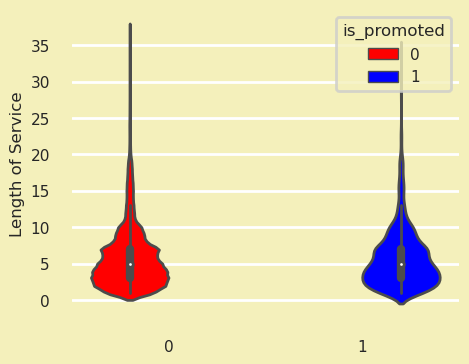

In [18]:
# Define custom colors
custom_colors = {0: "Red", 1: "Blue"}

print("Let's have a look on the distribution of subtype in the basal dataset :")
plt.subplots(figsize=(5, 4))
cp=sns.violinplot(x=train_df["is_promoted"],y=train_df["length_of_service"], hue = train_df['is_promoted'], palette=custom_colors, saturation=1, linewidth = 2)
cp.axes.set_xlabel("",fontsize=12)
cp.axes.set_ylabel("Length of Service",fontsize=12)
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})
sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the distribution of subtype in the basal dataset :


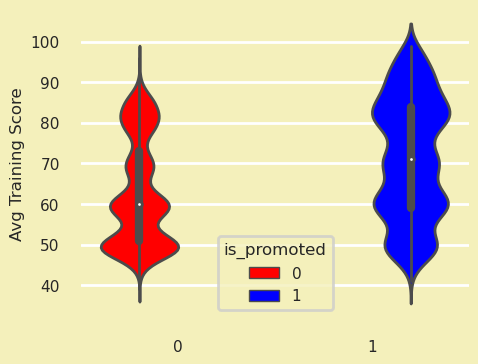

In [19]:
# Define custom colors
custom_colors = {0: "Red", 1: "Blue"}

print("Let's have a look on the distribution of subtype in the basal dataset :")
plt.subplots(figsize=(5, 4))
cp=sns.violinplot(x=train_df["is_promoted"],y=train_df["avg_training_score"], hue = train_df['is_promoted'], palette=custom_colors, saturation=1, linewidth = 2)
cp.axes.set_xlabel("",fontsize=12)
cp.axes.set_ylabel("Avg Training Score",fontsize=12)
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})
sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the distribution of subtype in the basal dataset :


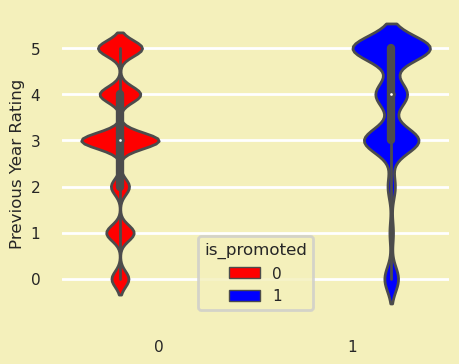

In [20]:
# Define custom colors
custom_colors = {0: "Red", 1: "Blue"}

print("Let's have a look on the distribution of subtype in the basal dataset :")
plt.subplots(figsize=(5, 4))
cp=sns.violinplot(x=train_df["is_promoted"],y=train_df["previous_year_rating"], hue = train_df['is_promoted'], palette=custom_colors, saturation=1, linewidth = 2)
cp.axes.set_xlabel("",fontsize=12)
cp.axes.set_ylabel("Previous Year Rating",fontsize=12)
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})
sns.despine(left=True, bottom=True)
plt.show()

Then, we are checking significant difference between the two groups using non-parametric test for __is_promoted__ vs __(age, previous_year_rating, length_of_service, and avg_training_score)__.

__Note:__ Firstly, I have already checked normality of the variables (__age, previous_year_rating, length_of_service, and avg_training_score__) and confirmed that they are non-normal. that's why I opted for the __Mann-Whitney U Test__.

In [21]:
import numpy as np
from scipy.stats import mannwhitneyu


# Function to perform Mann-Whitney U Test for each pair of variables
def mann_whitney_tests(dataframe):
    variables = dataframe.columns
    num_variables = len(variables)
    
    for col in dataframe.columns:  # Exclude 'is_promoted' from columns
        promoted = train_df[train_df['is_promoted'] == 1][col]
        not_promoted = train_df[train_df['is_promoted'] == 0][col]
        # Perform Mann-Whitney U Test
        stat, p_value = mannwhitneyu(promoted, not_promoted)
        print(f'Mann-Whitney U Test between is_promoted and {col}:')
        print(f'Statistic: {stat}')
        print(f'P-value: {p_value}')
        print('')

mann_whitney_tests(train_df[num_columns])

Mann-Whitney U Test between is_promoted and age:
Statistic: 114423048.5
P-value: 0.01169815463593087

Mann-Whitney U Test between is_promoted and previous_year_rating:
Statistic: 148956236.0
P-value: 5.514709499009339e-222

Mann-Whitney U Test between is_promoted and length_of_service:
Statistic: 115812965.5
P-value: 0.238132109492055

Mann-Whitney U Test between is_promoted and avg_training_score:
Statistic: 156778509.0
P-value: 0.0



__Observation:__

* __Visually (Violin Plot) and Statistically (Mann-Whitney U Test):__ __age, previous_year_rating, and avg_training_score__ have significant difference between the two groups (__promoted and non-promoted__) as __p-value<0.05__ and __length_of_service__ non-significant (__p-value>0.05__).

### <span style='color:rgb(0, 100, 0)'><b>Correlation Analysis</b> </span><a class="anchor" id="correlation"></a> 
<hr>

[Back to Table of Contents](#tc)

Correlation refers to a statistical measure that describes the strength and direction of a relationship between two variables. It assesses how changes in one variable are associated with changes in another variable. In data analysis and modeling, correlation helps identify which variables are strongly related, aiding in feature selection for predictive models.

__How it Works:__

* __Correlation Coefficient:__ A numerical measure between -1 and 1 that represents the strength and direction of the relationship.
* __Positive Correlation:__ When one variable increases, the other tends to increase as well (correlation coefficient close to +1).
* __Negative Correlation:__ When one variable increases, the other tends to decrease (correlation coefficient close to -1).
* __No Correlation:__ When there's no discernible relationship between the variables (correlation coefficient close to 0).

Here, we will check correlation between numerical variables __age, previous_year_rating, length_of_service, and avg_training_score__ for redundency. 

In [22]:
# Calculate the correlation matrix
correlation_matrix = train_df[num_columns].corr()

# Display the correlation matrix in a well-formatted table
correlation_table = correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

# Show the correlation table
correlation_table

,age,previous_year_rating,length_of_service,avg_training_score
age,1.00,0.18,0.66,-0.05
previous_year_rating,0.18,1.00,0.19,0.06
length_of_service,0.66,0.19,1.00,-0.04
avg_training_score,-0.05,0.06,-0.04,1.00


__Observation:__

* Variables are not highly correlated. Assuming there is no collinearity in the variables.

### <span style='color:rgb(0, 100, 0)'><b>4.4 | Chi-Square Test for Independence</b></span><a class="anchor" id="chiSquare"></a> 
<hr>

[Back to Table of Contents](#tc)

The __chi-square test__ is a statistical test used to determine whether there is a significant association between categorical variables. In feature selection for machine learning, chi-square tests can help identify relevant features for classification tasks.

__How it Works:__
* __Null Hypothesis:__ Assumes no association between variables (independence).
* __P-value Interpretation:__ If the p-value is below a chosen significance level (usually 0.05), the null hypothesis is rejected, indicating a significant association.

Here, we check significant association between variables __is_promoted__ vs __(awards_won, gender, recruitment_channel, education, and department)__.

In [23]:
# Create a contingency table using pandas crosstab function
contingency_awards_won = pd.crosstab(train_df['is_promoted'], train_df['awards_won?'])

print(contingency_awards_won)

awards_won?      0    1
is_promoted            
0            49429  711
1             4109  559


In [24]:
# Create a contingency table using pandas crosstab function
contingency_gender = pd.crosstab(train_df['is_promoted'], train_df['gender'])

print(contingency_gender)

gender           f      m
is_promoted              
0            14845  35295
1             1467   3201


In [25]:
# Create a contingency table using pandas crosstab function
contingency_recruitment = pd.crosstab(train_df['is_promoted'], train_df['recruitment_channel'])

print(contingency_recruitment)

recruitment_channel  other  referred  sourcing
is_promoted                                   
0                    27890      1004     21246
1                     2556       138      1974


In [26]:
# Create a contingency table using pandas crosstab function
contingency_education = pd.crosstab(train_df['is_promoted'], train_df['education'])

print(contingency_education)

education    Bachelor's  Below Secondary  Master's & above  Unknown
is_promoted                                                        
0                 33661              738             13454     2287
1                  3008               67              1471      122


In [27]:
# Note - Excluded this due to violation of assumption of the Chi-Square test
# Create a contingency table using pandas crosstab function
#contingency_is_promoted_recruitment_region = pd.crosstab(train['is_promoted'], train['region'])

#print(contingency_is_promoted_recruitment_region)

In [28]:
# Create a contingency table using pandas crosstab function
contingency_department = pd.crosstab(train_df['is_promoted'], train_df['department'])

print(contingency_department)

department   Analytics  Finance    HR  Legal  Operations  Procurement  R&D  \
is_promoted                                                                  
0                 4840     2330  2282    986       10325         6450  930   
1                  512      206   136     53        1023          688   69   

department   Sales & Marketing  Technology  
is_promoted                                 
0                        15627        6370  
1                         1213         768  


In [29]:
from scipy.stats import chi2_contingency

#Perform chi-square tests
def perform_chi2_test(table):
    chi2, p, dof, expected = chi2_contingency(table)
    return chi2, p, dof, expected

In [30]:
# Perform chi-square test for each pair
results = {}
results['recruitment_channel'] = perform_chi2_test(contingency_recruitment)
results['gender'] = perform_chi2_test(contingency_gender)
results['education'] = perform_chi2_test(contingency_education)
#results['region'] = perform_chi2_test(contingency_region)
results['department'] = perform_chi2_test(contingency_department)
results['awards_won'] = perform_chi2_test(contingency_awards_won)

In [31]:
# Output the results
for var, (chi2, p, dof, expected) in results.items():
    print(f"Chi-square test for {var}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    print("\n")

Chi-square test for recruitment_channel:
Chi-square statistic: 19.23633518768639
P-value: 6.650937825577018e-05
Degrees of freedom: 2
Expected frequencies:
[[27852.91271347  1044.73580499 21242.35148154]
 [ 2593.08728653    97.26419501  1977.64851846]]


Chi-square test for gender:
Chi-square statistic: 6.677254566546107
P-value: 0.009765091521176657
Degrees of freedom: 1
Expected frequencies:
[[14922.70617428 35217.29382572]
 [ 1389.29382572  3278.70617428]]


Chi-square test for education:
Chi-square statistic: 75.8734102338036
P-value: 2.354496308573832e-16
Degrees of freedom: 3
Expected frequencies:
[[33545.89950372   736.43811122 13653.83703109  2203.82535396]
 [ 3123.10049628    68.56188878  1271.16296891   205.17464604]]


Chi-square test for department:
Chi-square statistic: 151.42635516323872
P-value: 9.882497107474489e-29
Degrees of freedom: 8
Expected frequencies:
[[ 4896.1699022   2320.00875785  2212.05882353   950.50831995
  10381.49029339  6530.05619618   913.91512188 154

__Observation:__
* We observe the significant association between the categorical variables __is_promoted__ and the following factors: __awards_won, gender, recruitment_channel, education, and department__, with a p-value < 0.05.

### <span style='color:rgb(0, 100, 0)'><b>4.5 | Summary of Statistical Analysis</b></span><a class="anchor" id="summaryStats"></a> 
<hr>

[Back to Table of Contents](#tc)


* __Training__ and __Testing__ datasets are similar in terms of the variables they contain. We can say that testing dataset is representative of the training dataset.
* Both datasets have similar average values for key features like __age, previous_year_rating, length_of_service, awards_won?, and average_training_score.__
* Tarining and Testing dataset ratio is __70%:30%.__
* __is_promoted:__ Approximately __8.52%__ of employees have been promoted (values are 0 or 1). There is __imbalance data__.
* There are missing values in two variables __education (No. of missing values in train and test dataset = 2409, 1034)__ and __previous_year_rating (No. of missing values in train and test dataset = 4124, 1812)__. We handle this by imputing __"Unknown"__ for __education__ and __"0"__ for __previous_year_rating__ respectively.
* __Mann-Whitney U Test and Violin Plot__ suggest __age, previous_year_rating, and avg_training_score__ are significant features and __length_of_service__ is non-significant.
* __Correlation__ suggests there are no collinearity between the numerical variables.
* __Chi-Square Test__ indicates a significant association between the categorical variables __is_promoted__ and the following factors: __awards_won, gender, recruitment_channel, education, and department__, with a p-value < 0.05.

## <span style='color:rgb(0, 100, 0)'><b>5 | Key Findings in Visualization</b> </span><a class="anchor" id="visualizationInsights"></a> 
<hr>

[Back to Table of Contents](#tc)

### <span style='color:rgb(0, 100, 0)'><b>5.1 | Count Plots and Pie Charts for Single Categorical Feature</b> </span><a class="anchor" id="catPlot"></a> 

Count plots are a powerful tool for exploring and understanding the distribution of categorical variables, providing a straightforward and interpretable visual summary of the data.

Using this for __frequency visualization of each category, comparison of categories, identify imbalances in the distribution of categories, identify rare or infrequent categories__ that might need special attention or treatment during data preprocessing, and __visualize relationships between two categorical variables__.

In [32]:
print("The number of categories in each categorical variable:")
train_df[cat_columns].nunique()

The number of categories in each categorical variable:


department              9
region                 34
education               4
gender                  2
recruitment_channel     3
no_of_trainings        10
awards_won?             2
dtype: int64

Let's have a look on the distribution of department in the trainig dataset :


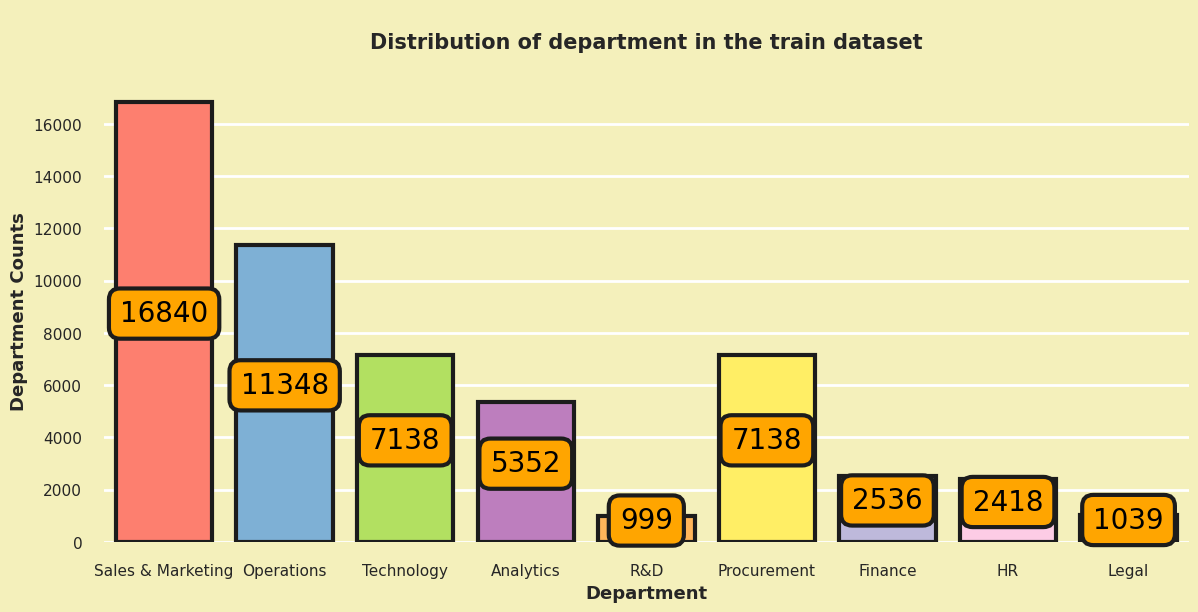

In [33]:
print("Let's have a look on the distribution of department in the trainig dataset :")
plt.subplots(figsize=(14, 6))
cp=sns.countplot(x=train_df["department"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
#p=sns.countplot(x=train_df["rating_round"],order=train_df["rating_round"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
cp.axes.set_title("\nDistribution of department in the train dataset\n",fontsize=15,fontweight='bold')
cp.axes.set_xlabel("Department",fontsize=13,fontweight='bold')
cp.axes.set_ylabel("Department Counts",fontsize=13,fontweight='bold')
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

__Observation:__
*  Sales & Marketing and Operations have the most substantial number of employees, indicating these departments might be pivotal in the company's operations.
* Analytics, Finance, HR, Legal, and R&D have smaller employee counts compared to Sales & Marketing and Operations, signifying potentially specialized or smaller-focused departments within the organization.

Let's have a look on the distribution of recruitment channel in the training dataset :


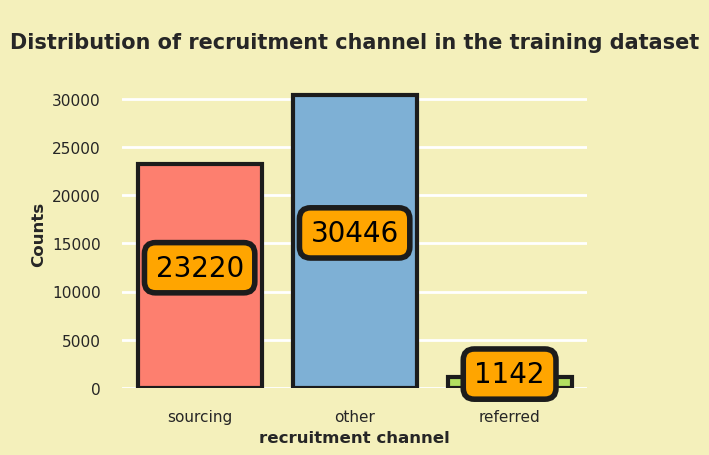

In [34]:
print("Let's have a look on the distribution of recruitment channel in the training dataset :")
plt.subplots(figsize=(6, 4))
cp=sns.countplot(x=train_df["recruitment_channel"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
#p=sns.countplot(x=train_df["rating_round"],order=train_df["rating_round"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
cp.axes.set_title("\nDistribution of recruitment channel in the training dataset\n",fontsize=15,fontweight='bold')
cp.axes.set_xlabel("recruitment channel",fontsize=12,fontweight='bold')
cp.axes.set_ylabel("Counts",fontsize=12,fontweight='bold')
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

__Observation:__
* The organization seems to heavily rely on the 'Other' and 'Sourcing' channels for recruitment, suggesting they might have established networks or methods for attracting a larger pool of candidates.

Let's have a look on the distribution of previous year rating in the training dataset :


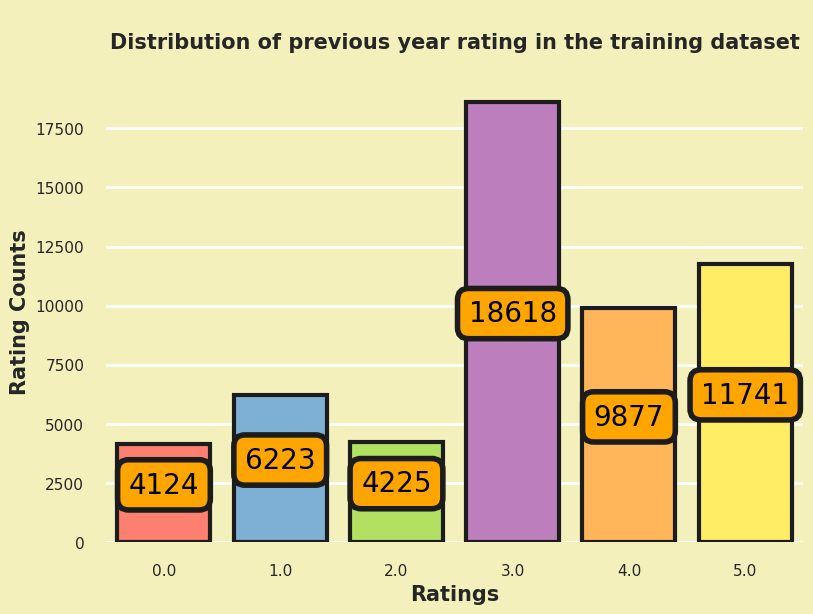

In [35]:
print("Let's have a look on the distribution of previous year rating in the training dataset :")
plt.subplots(figsize=(9, 6))
cp=sns.countplot(x=train_df["previous_year_rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
cp.axes.set_title("\nDistribution of previous year rating in the training dataset\n",fontsize=15,fontweight='bold')
cp.axes.set_xlabel("Ratings",fontsize=15,fontweight='bold')
cp.axes.set_ylabel("Rating Counts",fontsize=15,fontweight='bold')
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

__Observation:__
* Ratings 3.0, 4.0, and 5.0 indicate a significant portion of the employee population, suggesting a more prevalent performance distribution within this range.

Let's have a look on education distribution:


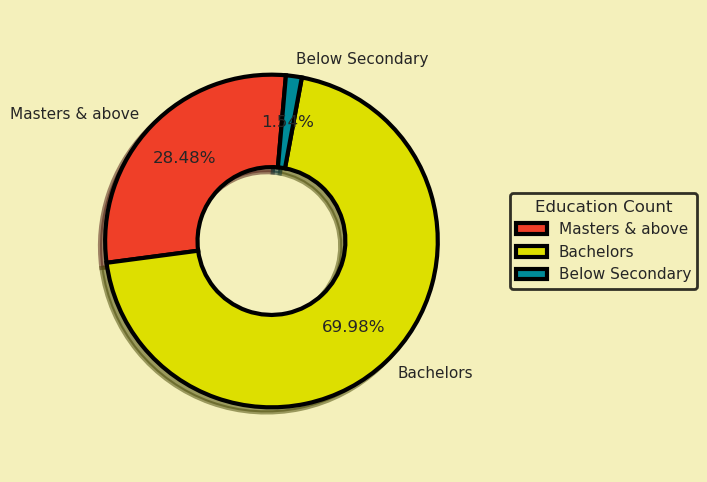

In [36]:
print(f"Let's have a look on education distribution:")
plt.subplots(figsize=(6, 6))

labels = 'Masters & above', 'Bachelors', 'Below Secondary',
sizes = [14925, 36669, 805]
size = 0.5

wedges, texts, autotexts = plt.pie(sizes, labels=labels,
                                    autopct = "%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#ef3f28","#dddf00","#008b99"],  #"#11264e","#dcbd6e",,"#008b99"
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 3),
                                    startangle = 85)

plt.legend(wedges, labels, title="Education Count",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.show()

__Obseravtion:__
* A substantial majority of employees hold a Bachelor's degree, indicating that it is the most prevalent educational qualification among the workforce.
* Employees with education levels below secondary school are notably fewer in count, indicating that this category represents a minority within the organization.
* The category 'Unknown Education' encompasses a considerable count, signifying either a lack of available data regarding education or potentially employees who haven't provided this information.

Let's have a look on Gender distribution:


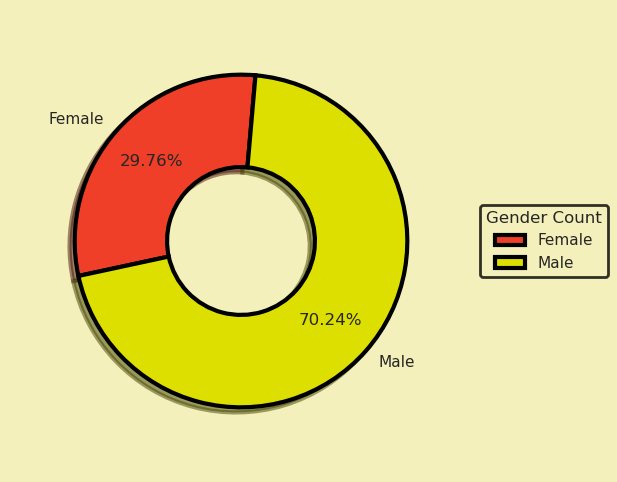

In [37]:
print(f"Let's have a look on Gender distribution:")
plt.subplots(figsize=(6, 6))

labels = 'Female', 'Male',
sizes = [16312, 38496]
size = 0.5

wedges, texts, autotexts = plt.pie(sizes, labels=labels,
                                    autopct = "%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#ef3f28","#dddf00"],  #"#11264e","#dcbd6e",,"#008b99"
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 3),
                                    startangle = 85)

plt.legend(wedges, labels, title="Gender Count",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.show()

__Observation:__
* There is a noticeable gender gap within the organization, with a significantly higher count of male employees compared to female employees.
* Female employees, while fewer in count, still constitute a substantial portion of the overall workforce, contributing to the organization's diversity.

### <span style='color:rgb(0, 100, 0)'><b>5.2 | Cat Plots for Multiple Features</b> </span><a class="anchor" id="catMulti"></a> 
[Back to Table of Contents](#tc)

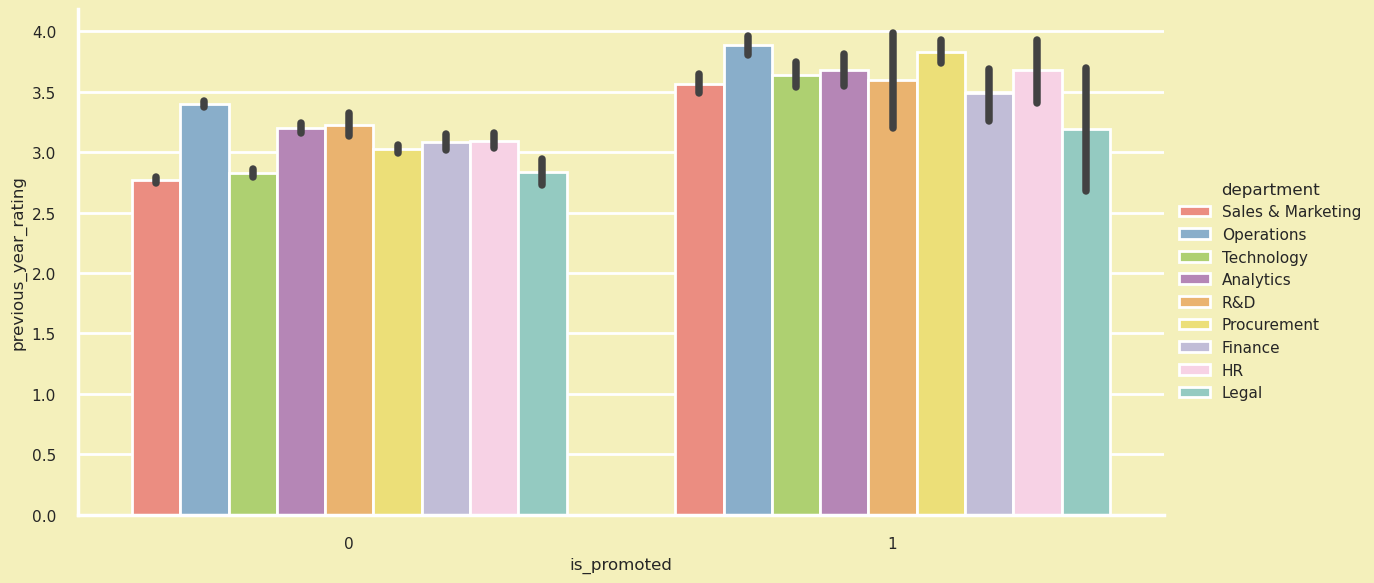

In [38]:
sns.catplot(x="is_promoted", y="previous_year_rating", hue="department", kind="bar", data=train_df, palette=palette, height=6, aspect=2)

__Observation:__
* Across most departments, higher previous year ratings (e.g., 4.0 and 5.0) tend to correlate with more promotions. 

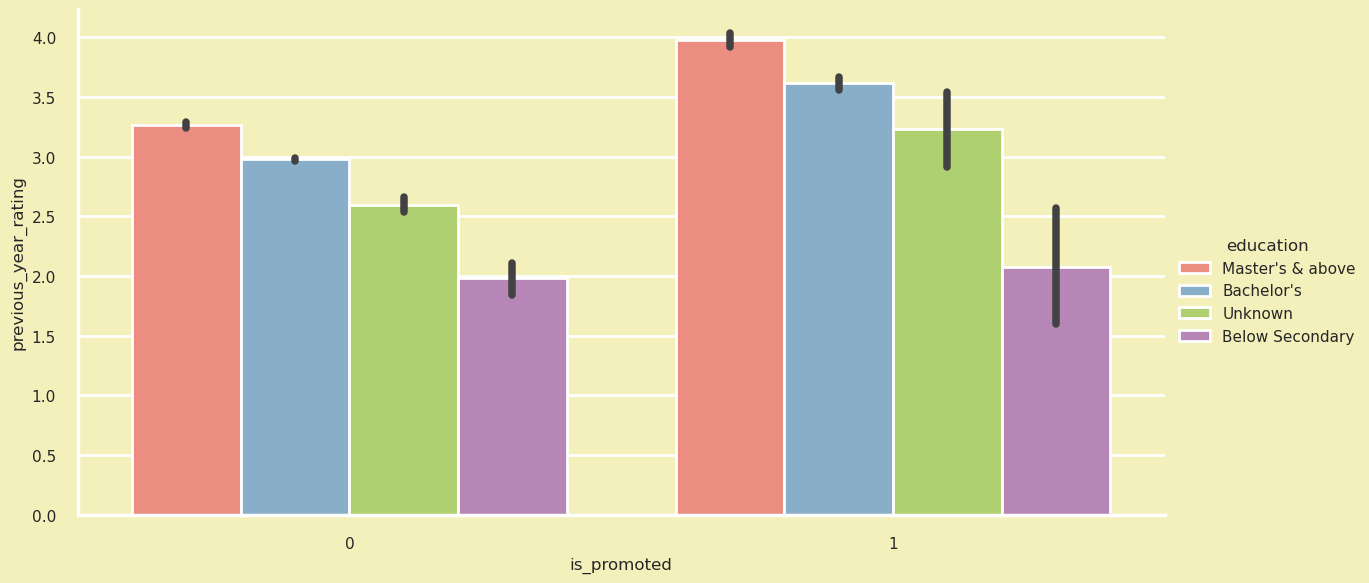

In [39]:
sns.catplot(x="is_promoted", y="previous_year_rating", hue="education", kind="bar", data=train_df, palette=palette, height=6, aspect=2)

__Observation:__
* Employees with higher education levels ("Master's & above") show a more consistent ratio of promotions across various ratings, indicating a potential correlation between higher education and higher chances of promotion.
* Employees with "Below Secondary" education have the lowest count across all ratings and show minimal instances of promotions.

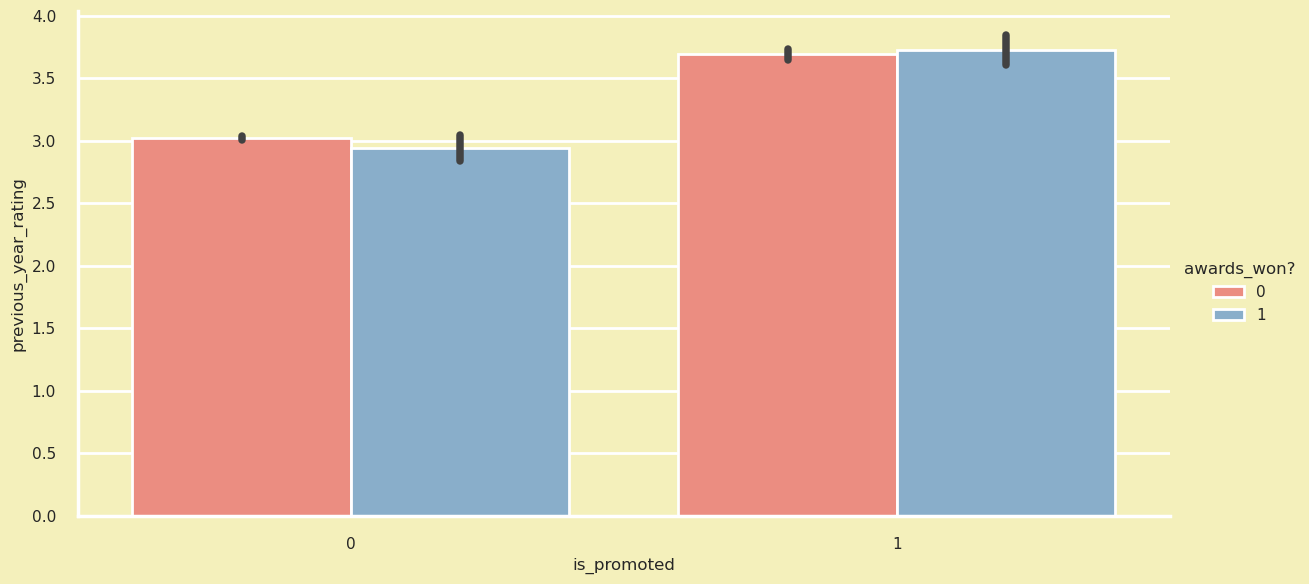

In [40]:
sns.catplot(x="is_promoted", y="previous_year_rating", hue="awards_won?", kind="bar", data=train_df, palette=palette, height=6, aspect=2)

__Observation:__
* Employees without awards represent the majority and have a significant count of promotions, emphasizing that promotions are not solely reliant on awards.

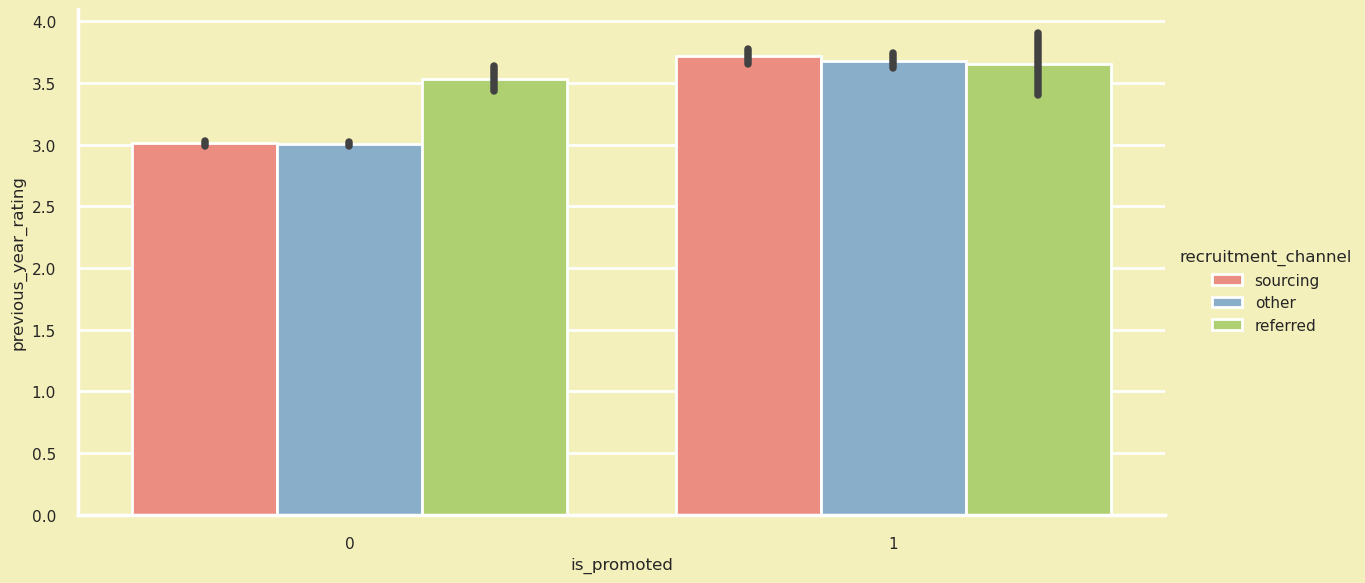

In [41]:
sns.catplot(x="is_promoted", y="previous_year_rating", hue="recruitment_channel", kind="bar", data=train_df, palette=palette, height=6, aspect=2)

__Observation__
* Employees recruited through these two channels (__other and sourcing__) show the highest count of non-promotions (is_promoted = 0) across different previous year ratings.

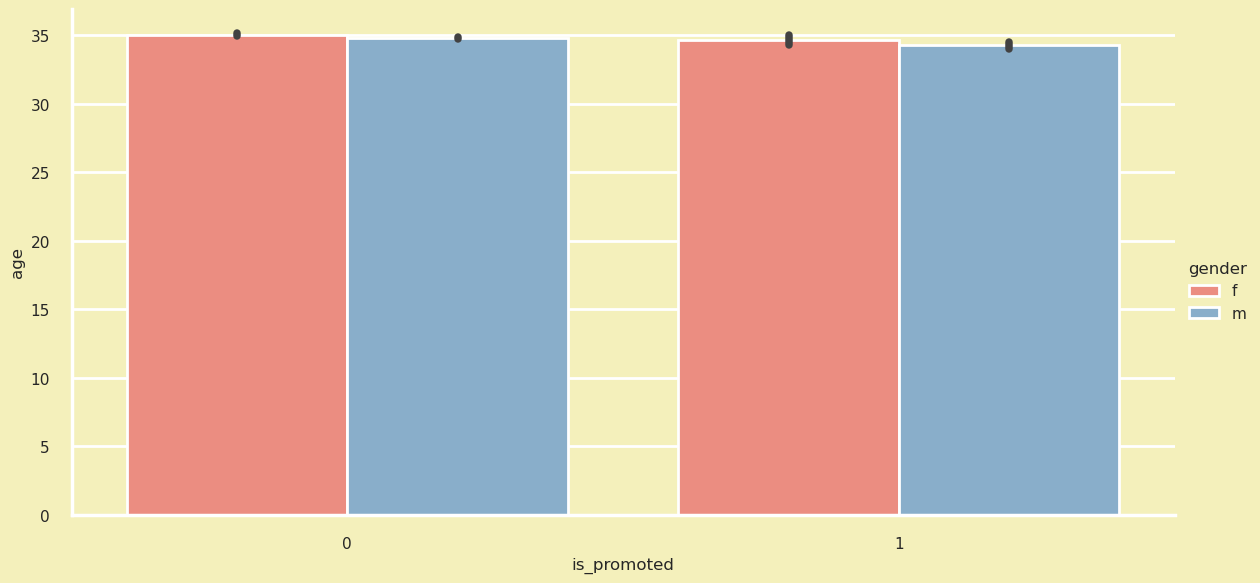

In [42]:
sns.catplot(x="is_promoted", y="age", hue="gender", kind="bar", data=train_df, palette=palette, height=6, aspect=2)

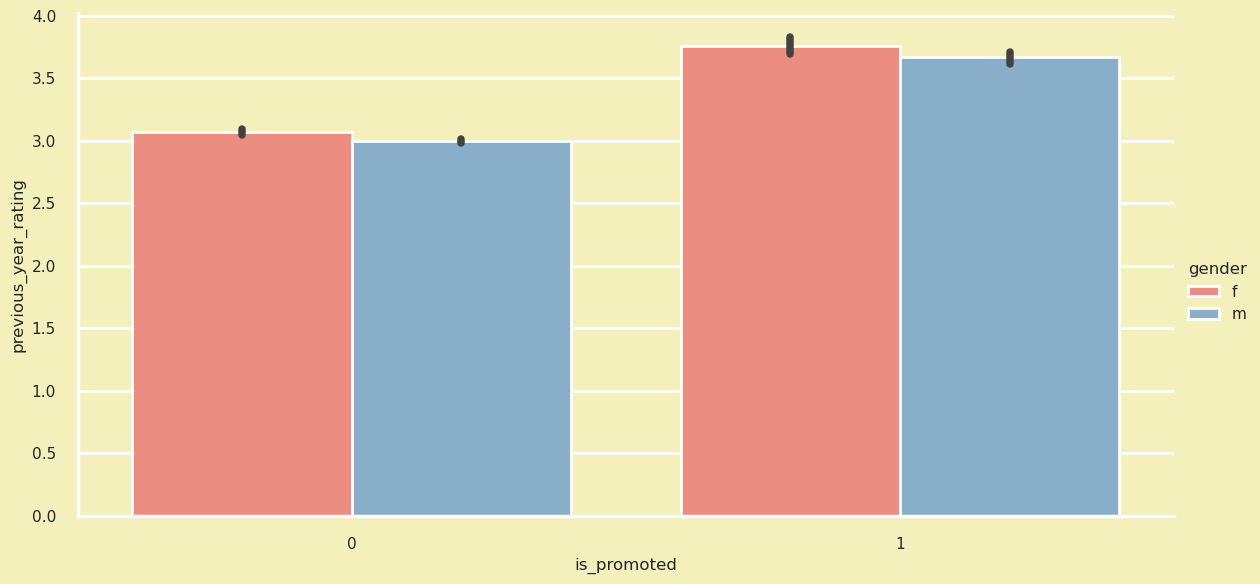

In [43]:
sns.catplot(x="is_promoted", y="previous_year_rating", hue="gender", kind="bar", data=train_df,palette=palette, height=6, aspect=2)

__Observation:__
* The workforce comprises a higher count of male employees (gender = m) across all previous year ratings compared to female employees (gender = f).
* The count of non-promotions (is_promoted = 0) is notably higher for male employees across different previous year ratings.
* Employees, both male and female, with lower previous year ratings (0.0 to 2.0) exhibit fewer instances of promotions, suggesting that employees with lower ratings are less likely to be promoted, irrespective of gender.
* Higher previous year ratings (4.0 and 5.0) consistently display a larger count of promotions for both male and female employees, indicating that higher ratings generally correlate with more promotions for both genders.

### <span style='color:rgb(0, 100, 0)'><b>5.3 | Summary of Visualization</b> </span><a class="anchor" id="summaryVisualization"></a> 
<hr>

[Back to Table of Contents](#tc)

* Sales & Marketing and Operations have the most substantial number of employees, indicating these departments might be pivotal in the company's operations.
* The organization seems to heavily rely on the 'Other' and 'Sourcing' channels for recruitment, suggesting they might have established networks or methods for attracting a larger pool of candidates.
* Across most departments, higher previous year ratings (e.g., 4.0 and 5.0) tend to correlate with more promotions.
* Employees with higher education levels ("Master's & above") show a more consistent ratio of promotions across various ratings, indicating a potential correlation between higher education and higher chances of promotion.
* Employees without awards represent the majority and have a significant count of promotions, emphasizing that promotions are not solely reliant on awards.
* Higher previous year ratings (4.0 and 5.0) consistently display a larger count of promotions for both male and female employees, indicating that higher ratings generally correlate with more promotions for both genders.


## <span style='color:rgb(0, 100, 0)'><b>6 | Data Preprocessing</b></span><a class="anchor" id="dataPreprocessing"></a> 
[Back to Table of Contents](#tc)
<hr>

Data preprocessing refers to a set of techniques used to prepare raw data into a clean, understandable format before it's utilized in machine learning or data analysis processes.

### <span style='color:rgb(0, 100, 0)'><b>6.1 | Define Pipeline for Data Preprocessing</b></span><a class="anchor" id="definePipeline"></a>
[Back to Table of Contents](#tc)
<hr>

In data preprocessing pipeline, we handle Missing Values, Categorical Data (Used: one-hot encoding), Scaling numerical variables. 

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train = train.drop(id_dep_columns,axis=1)
y_train = train.is_promoted
X_test = test.drop("employee_id",axis=1)

# Preprocessing for numerical data
# Note: only previous_year_rating will be filled missing values with 0
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
# Note: only education will be filled missing values with Unknown
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ])

# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_processed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_processed = pipeline.transform(X_test)


In [45]:
# Get column names after preprocessing
#transformed_columns = pipeline.named_steps['preprocessor'].get_feature_names_out()

## <span style='color:rgb(0, 100, 0)'><b>7 | Machine Learning Models</b></span><a class="anchor" id="mlModels"></a> 
[Back to Table of Contents](#tc)
<hr>

### <span style='color:rgb(0, 100, 0)'><b>7.1 | Logistic Regression, Random Forests, XGBoost, Neural Networks</b></span><a class="anchor" id="models"></a> 
[Back to Table of Contents](#tc)
<hr>

__Logistic Regression:__

* Logistic Regression is like a simple, reliable tool for saying 'yes' or 'no'—great when you want to understand how one thing affects another.

__Random Forests:__

* Random Forests work like a wise crowd, combining many opinions to make a strong decision, especially when things get a bit complicated.

__XGBoost:__

* XGBoost is like a super-smart student who quickly figures out the best way to solve a problem, making it awesome for tricky tasks.

__Neural Networks:__

* Neural Networks are like brains for computers, learning and understanding complex stuff, perfect for tasks where things get a bit tricky or messy.

In [46]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('Neural Network', MLPClassifier())
]

# Scoring metrics
scoring = ['accuracy', 'roc_auc', 'f1']

results = []

# 5-fold cross-validation for each model using different scoring metrics
for name, model in models:
    model_results = []
    for score in scoring:
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = cross_val_score(model, X_train_processed, y_train, cv=kfold, scoring=score)
        model_results.append((score, cv_results))
        print(f'{name} - {score}: Mean: {np.mean(cv_results):.4f}, Std Dev: {np.std(cv_results):.4f}')
    results.append((name, model_results))

# Save results to a DataFrame
results_dict = {}
for name, model_scores in results:
    for score, scores in model_scores:
        results_dict[f'{name}_{score}'] = scores

results_df = pd.DataFrame(results_dict)
#results_df.to_csv('models_crossval_results_scores.csv', index=False)

Logistic Regression - accuracy: Mean: 0.9380, Std Dev: 0.0008
Logistic Regression - roc_auc: Mean: 0.7776, Std Dev: 0.0140
Logistic Regression - f1: Mean: 0.4399, Std Dev: 0.0092
Random Forest - accuracy: Mean: 0.9329, Std Dev: 0.0017
Random Forest - roc_auc: Mean: 0.7732, Std Dev: 0.0122
Random Forest - f1: Mean: 0.4212, Std Dev: 0.0209
XGBoost - accuracy: Mean: 0.9418, Std Dev: 0.0012
XGBoost - roc_auc: Mean: 0.8164, Std Dev: 0.0121
XGBoost - f1: Mean: 0.5046, Std Dev: 0.0150
Neural Network - accuracy: Mean: 0.9371, Std Dev: 0.0017
Neural Network - roc_auc: Mean: 0.7912, Std Dev: 0.0072
Neural Network - f1: Mean: 0.5050, Std Dev: 0.0237


In [47]:
results_df

,Logistic Regression_accuracy,Logistic Regression_roc_auc,Logistic Regression_f1,Random Forest_accuracy,Random Forest_roc_auc,Random Forest_f1,XGBoost_accuracy,XGBoost_roc_auc,XGBoost_f1,Neural Network_accuracy,Neural Network_roc_auc,Neural Network_f1
0,0.938606,0.779337,0.447001,0.933954,0.768035,0.434646,0.942711,0.810476,0.517665,0.937603,0.791711,0.522064
1,0.936508,0.756538,0.423841,0.932038,0.760923,0.413849,0.940066,0.805364,0.482270,0.936964,0.781277,0.476771
2,0.938515,0.784405,0.441128,0.933041,0.788912,0.435938,0.942529,0.831311,0.510870,0.938606,0.793237,0.515085
3,0.938509,0.798204,0.450245,0.935316,0.786615,0.438378,0.942980,0.830846,0.520338,0.938327,0.802949,0.533994
4,0.937962,0.769440,0.437086,0.930298,0.761514,0.383428,0.940608,0.804167,0.491803,0.933856,0.786694,0.477188


In [48]:
# # Plotting combined AUC scores for all models
# #auc_scores = sorted(results_df.Mean_roc_auc, key=lambda x: x[1], reverse=True)  # Sort by AUC scores

# for n,model,mean,std in results_df:
#     print(n)
#     #plt.text(0.5, 0.3, f'{mean} (AUC = {mean:.2f})', ha='center', va='center')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Different Models')
# plt.legend(loc='lower right')
# plt.grid()
# plt.show()

## <span style='color:rgb(0, 100, 0)'><b>7.2 | Summary of Machine Learning Models</b></span><a class="anchor" id="summaryModels"></a> 
[Back to Table of Contents](#tc)
<hr>

#### __Let's analyze the performance of the models based on the performance measures (Accuracy, ROC AUC, F1 Score):__

* __XGBoost__ seems to outperform other models with higher accuracy, the best ROC AUC score, and the highest F1 score, indicating better overall performance and class separation ability.
* __Logistic Regression, Random Forest, and Neural Network__ perform moderately well but show slightly lower performance compared to XGBoost in terms of AUC and F1 score.
* The __Logistic Regression model__, despite having consistent results with low standard deviations, shows lower performance in terms of discrimination and overall balance between precision and recall compared to __XGBoost__.
* The choice of the best model might depend on the specific requirements and trade-offs between different performance measures. For instance, if higher precision and recall are crucial, __XGBoost__ might be preferable due to its __higher F1 score__.

## <span style='color:rgb(0, 100, 0)'><b>8 | Final Model, and Interpretation</b></span><a class="anchor" id="finalModel"></a> 
[Back to Table of Contents](#tc)
<hr>

After determining the best-performing model from the cross-validation, we rebuild the selected model using the entire training dataset and then predict the on the unseen dataset.

Our best-performing model: __XGBoost__

In [49]:
# Rebuilding the best model (XGBoost) on the entire training dataset
best_model = XGBClassifier()  # Initialize the model with best hyperparameters found

# Train the best model on the entire training dataset
best_model.fit(X_train_processed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [50]:
# import shap
# #import xgboost as xgb

# # Create a SHAP explainer
# explainer = shap.Explainer(best_model)
# shap_values = explainer.shap_values(X_train_processed)

# # Get feature names from the DataFrame
# feature_names = X_train.columns
# # SHAP Feature Importance Plot
# shap.summary_plot(shap_values, X_train_processed, feature_names=feature_names, plot_type="bar")

# # SHAP Force Plot (individual predictions)
# # Select an instance for force plot (e.g., the first instance)
# #shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_processed.iloc[0,:])

# # SHAP Decision Plot (showing the impact of features on predictions)
# #shap.decision_plot(explainer.expected_value, shap_values, X_train_processed)

### <span style='color:rgb(0, 100, 0)'><b>Predict whether a potential promotee at checkpoint in the test set will be promoted or not</b></span><a class="anchor" id="predict"></a> 
[Back to Table of Contents](#tc)
<hr>

In [51]:
# Predictions on the test dataset
y_pred = best_model.predict(X_test_processed)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

## <span style='color:rgb(0, 100, 0)'><b>9 | Submission</b></span><a class="anchor" id="submission"></a> 
[Back to Table of Contents](#tc)
<hr>

In [52]:
test_pred = pd.DataFrame(y_pred)
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'employee_id'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['employee_id'] = test_pred['employee_id'] + 1

test_pred.head()

,employee_id,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [53]:
test_pred.to_csv('submission.csv', index = False)

<span style='color:rgb(205, 0, 153)'>__Many thanks for reading my kernal!__🙏

<span style='color:rgb(205, 0, 153)'>__Please leave a comment if you have any suggestions for improving the analysis!__🏋🥇

<span style='color:rgb(0,204,0)'>__If you liked 😊 my kernel, give 👍 UPVOTE!__

<span style='color:rgb(205, 0, 153)'>__If you have a moment, I encourage you to see my other [kernels](https://www.kaggle.com/itsmohammadshahid/code?scroll=true).__